<a href="https://colab.research.google.com/github/casperbh96/Activation-Functions-Search/blob/master/Experiment_Activation_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example code for search of best activation function
### Joseph Suematsu, Samuel Chen, Ryan Reed

# 1. Importing and preprocessing

In [ ]:
# IMPORTS
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, LeakyReLU
from keras.layers.noise import AlphaDropout
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
from keras.optimizers import Adam
from keras.backend import sigmoid

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Scale images to the [-1, 1] range
x_train = (x_train.astype("float32") - 255) / 255
x_test = (x_test.astype("float32") - 255) / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# 2. Creating Neural Network

In [ ]:
# Readying neural network model
def build_cnn(activation,
              dropout_rate,
              optimizer):
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation=activation),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation=activation),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )
    model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizer, 
    metrics=['accuracy',
             'MeanSquaredError',
             'AUC']
    )
    
    return model

# Add the Swish function to Keras
def swish05(x, beta = 0.5):
  return (x * sigmoid(beta * x))
get_custom_objects().update({'swish05': Activation(swish05)})

def swish1(x, beta = 1):
  return (x * sigmoid(beta * x))
get_custom_objects().update({'swish1': Activation(swish1)})

def swish15(x, beta = 1.5):
  return (x * sigmoid(beta * x))
get_custom_objects().update({'swish15': Activation(swish15)})

# Add leaky-relu and gelu so we can use it as a string
get_custom_objects().update({'leaky-relu': Activation(LeakyReLU(alpha=0.2))})

get_custom_objects().update({'gelu': Activation(tf.keras.activations.gelu)})

act_func = ['swish05', 'swish1', 'swish15', 'leaky-relu', 'gelu']

# 3. Fitting the data with multiple activation functions

In [ ]:
result = []

for activation in act_func:
    print('\nTraining with -->{0}<-- activation function\n'.format(activation))
    
    model = build_cnn(activation=activation,
                      dropout_rate=0.2,
                      optimizer=Adam(learning_rate = 2E-5, clipvalue=0.5))
    
    history = model.fit(x_train, y_train,
          validation_split=0.20,
          batch_size=32, # 128 is faster, but less accurate. 16/32 recommended
          epochs=200,
          verbose=1,
          validation_data=(x_test, y_test))
    
    result.append(history)
    
    K.clear_session()
    del model

print(result)


Training with -->swish05<-- activation function

Epoch 1/200
1500/1500 [==============================] - 22s 4ms/step - loss: 0.4763 - accuracy: 0.1251 - mean_squared_error: 0.0894 - auc: 0.5478 - val_loss: 0.3075 - val_accuracy: 0.3604 - val_mean_squared_error: 0.0830 - val_auc: 0.8060
Epoch 2/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2976 - accuracy: 0.3430 - mean_squared_error: 0.0804 - auc: 0.7858 - val_loss: 0.2346 - val_accuracy: 0.6158 - val_mean_squared_error: 0.0606 - val_auc: 0.9274
Epoch 3/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2349 - accuracy: 0.5187 - mean_squared_error: 0.0628 - auc: 0.8912 - val_loss: 0.1833 - val_accuracy: 0.6810 - val_mean_squared_error: 0.0451 - val_auc: 0.9554
Epoch 4/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1992 - accuracy: 0.6003 - mean_squared_error: 0.0524 - auc: 0.9282 - val_loss: 0.1623 - val_accuracy: 0.7010 - val_mean_squared_error: 0.0406 - val_auc: 

# 4. Graph the results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


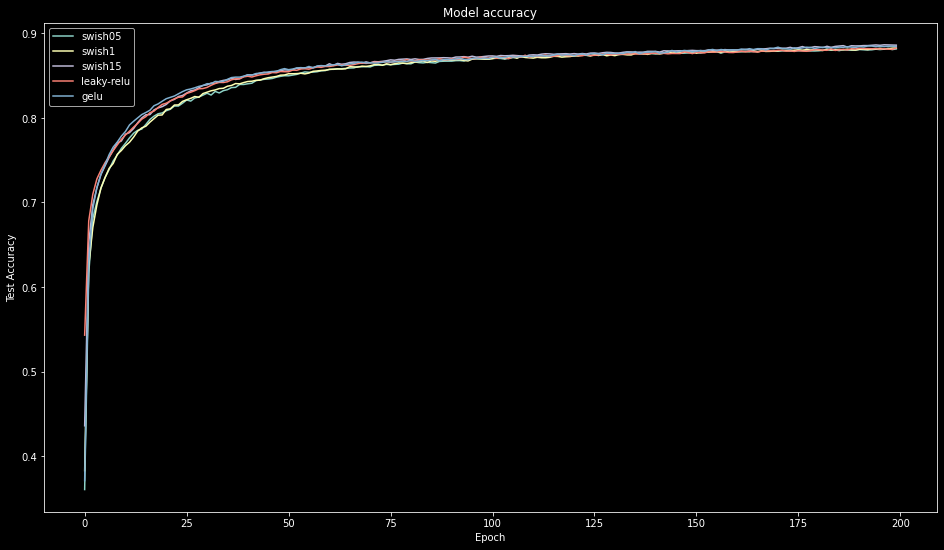

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


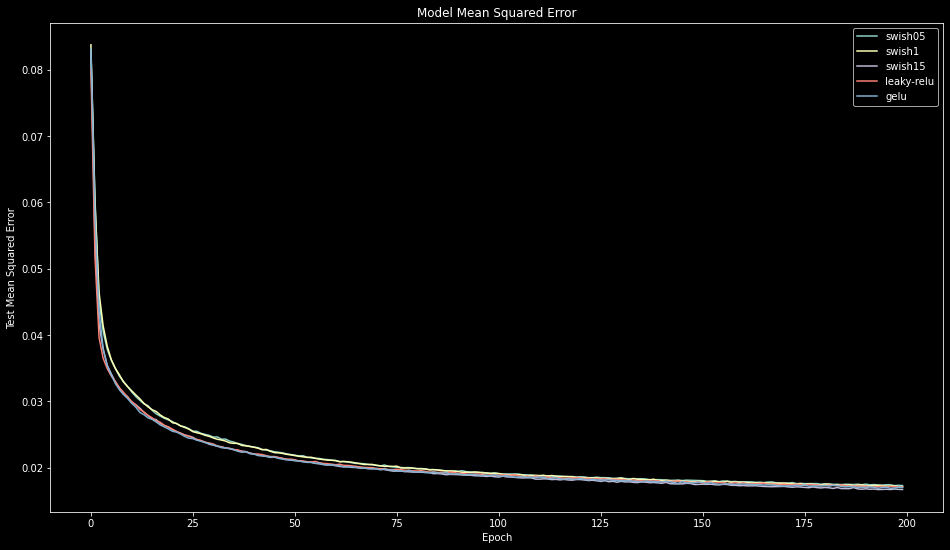

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


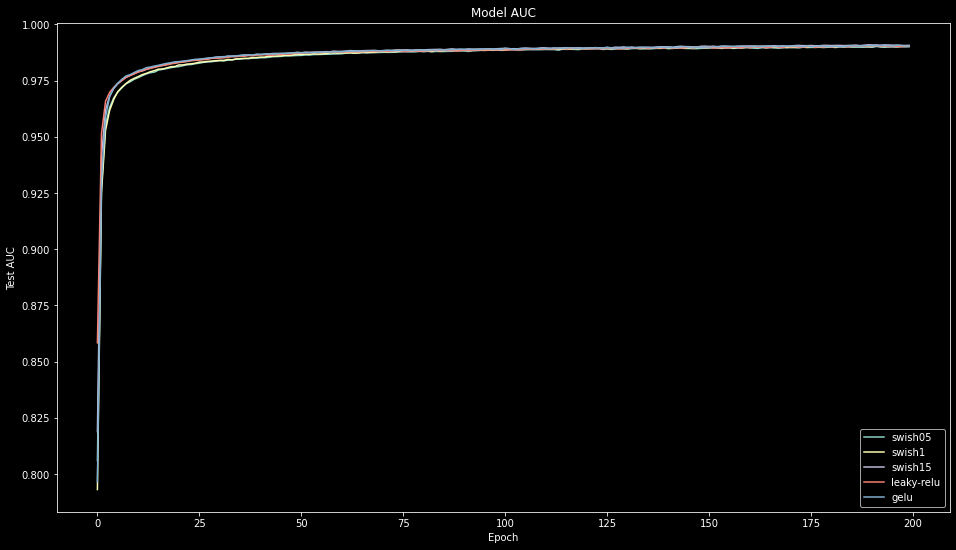

In [ ]:
def plot_act_func_results(results, activation_functions = []):
    plt.figure(figsize=(16,9))
    plt.style.use('dark_background')

    # Plot validation accuracy values
    for act_func in results:
        plt.plot(act_func.history['val_accuracy'])
        plt.axes()
        
    plt.title('Model accuracy')
    plt.ylabel('Test Accuracy')
    plt.xlabel('Epoch')
    plt.legend(activation_functions)
    plt.show()

    # Plot validation loss values
    plt.figure(figsize=(16,9))
    
    for act_func in results:
        plt.plot(act_func.history['val_mean_squared_error'])
        plt.axes()
        
    plt.title('Model Mean Squared Error')
    plt.ylabel('Test Mean Squared Error')
    plt.xlabel('Epoch')
    plt.legend(activation_functions)
    plt.show()

    # Plot validation loss values
    plt.figure(figsize=(16,9))
    
    for act_func in results:
        plt.plot(act_func.history['val_auc'])
        plt.axes()
        
    plt.title('Model AUC')
    plt.ylabel('Test AUC')
    plt.xlabel('Epoch')
    plt.legend(activation_functions)
    plt.show()

plot_act_func_results(result, act_func)